<a href="https://colab.research.google.com/github/blessjal/practicums/blob/master/hwk3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix

In [ ]:
auto = pd.read_csv('/content/sample_data/auto-mpg.csv')
auto.head()

,mpg,cyl,displ,hp,weight,accel,yr,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [ ]:
auto.columns =['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin', 'car name']


auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


**1(a) Create a binary variable, mpg01, that contains a 1 if mpg contains a value above its median and a 0 if mpg contains a value below its medi**an

In [ ]:
mpg_med = auto.mpg.median()
auto['mpg01'] = np.where(auto.mpg > mpg_med, 1, 0)

In [ ]:
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,mpg01
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,0
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,0
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,0
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,0
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,0


**1(b) Explore the data graphically in orderto investigate the association between mpg01 and the other features using scatterplots and boxplots. Describe your findings.**

In [ ]:
auto.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,mpg01
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209,0.836939
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932,-0.759194
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535,-0.753477
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171,-0.667053
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005,-0.757757
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746,0.346822
model year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528,0.429904
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000,0.513698
mpg01,0.836939,-0.759194,-0.753477,-0.667053,-0.757757,0.346822,0.429904,0.513698,1.000000


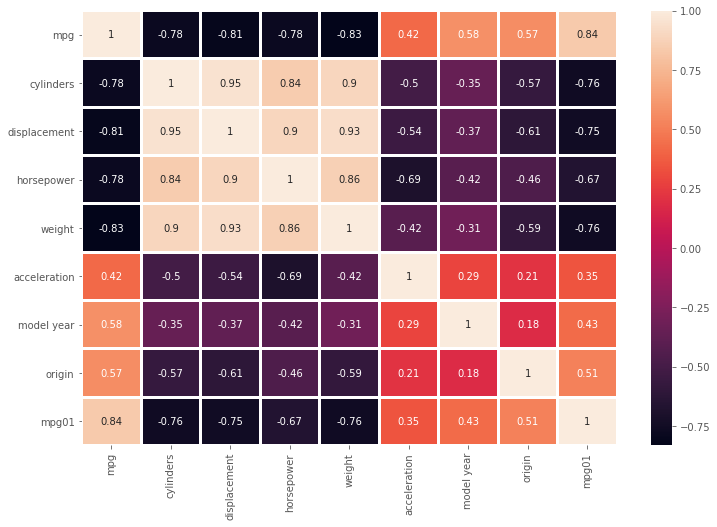

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(auto.corr(), annot=True, fmt='.2g', linewidths=2)

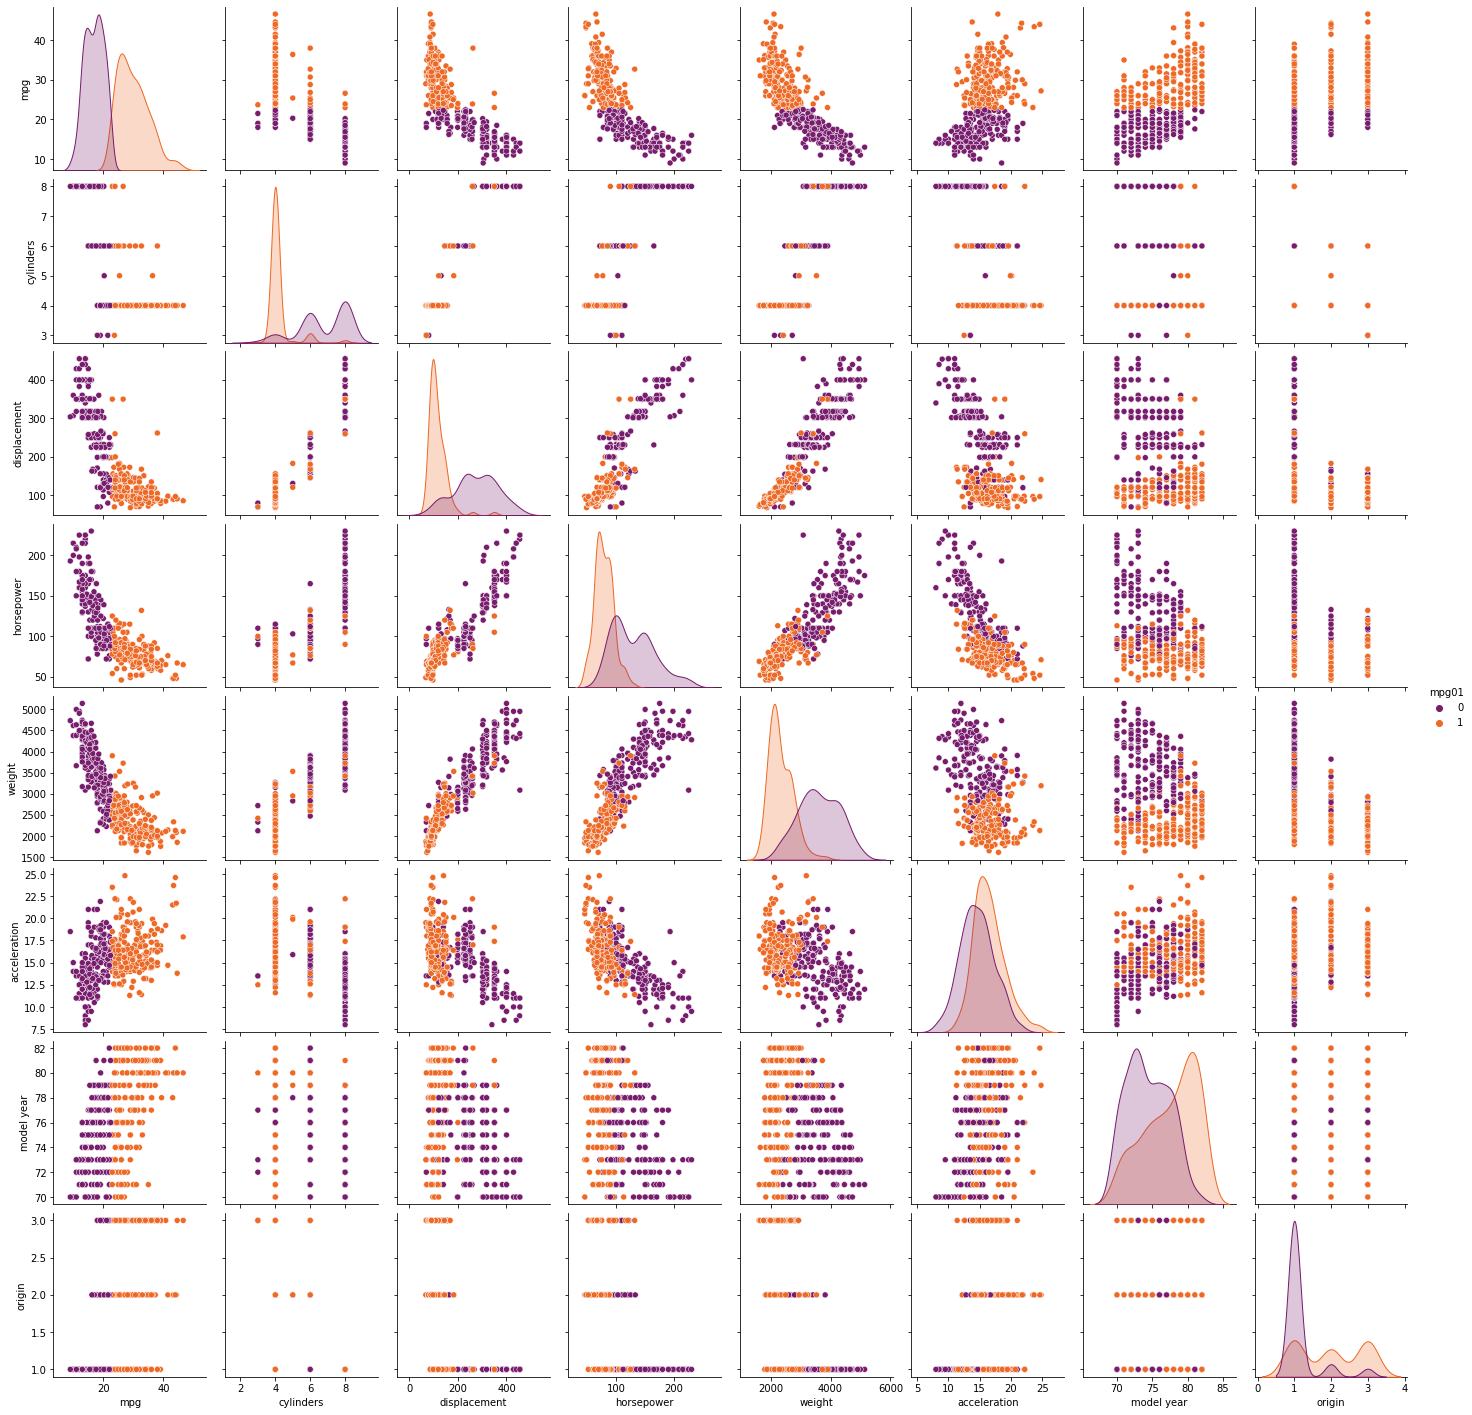

In [ ]:
sns.pairplot(auto, hue='mpg01', palette='inferno')

In [ ]:
auto['horsepower'] = auto[auto['horsepower'] != '?']
auto['horsepower'] = auto['horsepower'].astype('int64')

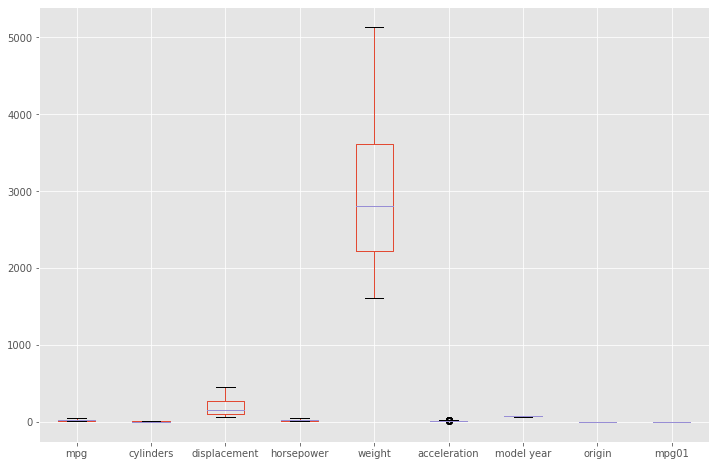

In [ ]:
plt.figure(figsize=(12, 8))
auto.boxplot()


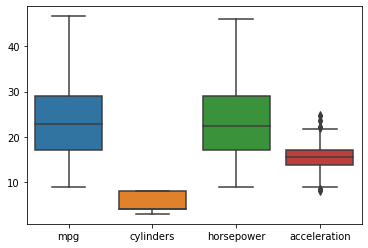

In [ ]:
sns.boxplot(data=auto[['mpg', 'cylinders','horsepower', 'acceleration' ]], orient='v')


**Data Processing **

**1(c) Split the dat into a training set and test set**

In [ ]:
X = auto.drop(['mpg01', 'car name', 'origin', 'model year', 'mpg', 'cylinders' ], axis=1)
y = auto['mpg01']

In [ ]:
X.columns

Index(['displacement', 'horsepower', 'weight', 'acceleration'], dtype='object')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(313, 4)
(79, 4)
(313,)
(79,)


**Transform data using StandardScalar()**

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

**1(d) Perform a logistic regression on the training data in order to predict mpg01 using variables that seemed most associated with mpg01. Calculate the test error.**

In [ ]:
lr = LogisticRegression()
lr_fit = lr.fit(X_train, y_train)

In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
y_pred

array([1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1])

In [ ]:
y_test

144    1
280    0
68     0
372    1
328    1
      ..
100    1
64     0
55     1
260    0
214    1
Name: mpg01, Length: 79, dtype: int64

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print('The accuracy of the logistic regression model is: ', accuracy)

The accuracy of the logistic regression model is:  0.9493670886075949


In [ ]:
mse = mean_squared_error(y_test, y_pred)
mse

0.05063291139240506

In [ ]:
error = np.sqrt(mse)

print('The error of the logistic regression model is:', error)

The error of the logistic regression model is: 0.2250175801852048


In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[38,  4],
       [ 0, 37]])

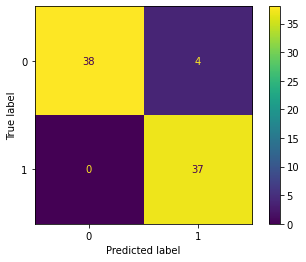

In [ ]:
from sklearn.metrics import plot_confusion_matrix, classification_report

plot_confusion_matrix(lr_fit, X_test, y_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        42
           1       0.90      1.00      0.95        37

    accuracy                           0.95        79
   macro avg       0.95      0.95      0.95        79
weighted avg       0.95      0.95      0.95        79



### Fit the LDA Model

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [ ]:
lda = LDA()
lda.fit(X_train, y_train)
lda_pred = lda.predict(X_test)

### Evaluate Model with stratified k-fold cross-validation

In [ ]:
#Define method to evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

#evaluate model
scores = cross_val_score(lda, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
print(np.mean(scores))  

0.9626008064516128


### Tune the model with GridSearchCV()

In [ ]:
# define grid
grid = {'solver': ['svd', 'lsqr', 'eigen'], 'shrinkage': np.arange(0, 1, 0.01), 'n_components': [0, 1, 2] }

# define search
search = GridSearchCV(lda, grid, scoring='accuracy', cv=cv, n_jobs=-1)

# fit the search
results = search.fit(X_train, y_train)

# summarize
print('Mean Accuracy: %.3f' % results.best_score_)
print('The best parameters of the model: %s' % results.best_params_)

Mean Accuracy: 0.964
The best parameters of the model: {'n_components': 0, 'shrinkage': 0.01, 'solver': 'lsqr'}


### Get the best parameters of the LDA model

In [ ]:
print('The best estimator of the model: ', results.best_estimator_)
print()
print('-'*100)
print('The best index of the model: ', results.best_index_)
print()
print('-'*100)
print('The best parameter of the model: ', results.best_params_)
print()
print('-'*100)
print('The best score of the model: ', results.best_score_)



The best estimator of the model:  LinearDiscriminantAnalysis(n_components=0, priors=None, shrinkage=0.01,
                           solver='lsqr', store_covariance=False, tol=0.0001)

----------------------------------------------------------------------------------------------------
The best index of the model:  4

----------------------------------------------------------------------------------------------------
The best parameter of the model:  {'n_components': 0, 'shrinkage': 0.01, 'solver': 'lsqr'}

----------------------------------------------------------------------------------------------------
The best score of the model:  0.9637096774193548


### Fit the QDA Model

In [ ]:
qda = QDA()
qda.fit(X_train, y_train)
qda_pred = qda.predict(X_test)

### Evaluate Model with stratified k-fold cross-validation

In [ ]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

#evaluate model
scores = cross_val_score(qda, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
print(np.mean(scores))  

0.9583333333333331


### Tune the model with GridSearchCV()

In [ ]:
grid = {
    'reg_param': (0.00001, 0.0001, 0.001,0.01, 0.1), 
    'store_covariance': (True, False),
    'tol': (0.0001, 0.001,0.01, 0.1), 
                   }
# define search
qda_search = GridSearchCV(qda, grid, scoring='accuracy', cv=cv, n_jobs=-1)

# fit the search
qda_results = qda_search.fit(X_train, y_train)

# summarize
print('Mean Accuracy: %.3f' % qda_results.best_score_)
print('The best parameters of the model: %s' % qda_results.best_params_)

Mean Accuracy: 0.958
The best parameters of the model: {'reg_param': 1e-05, 'store_covariance': True, 'tol': 0.0001}


### Get the best parameters of the QDA model

In [ ]:
print('The best estimator of the model: ', qda_results.best_estimator_)
print()
print('-'*100)
print('The best index of the model: ', qda_results.best_index_)
print()
print('-'*100)
print('The best parameter of the model: ', qda_results.best_params_)
print()
print('-'*100)
print('The best score of the model: ', qda_results.best_score_)



The best estimator of the model:  QuadraticDiscriminantAnalysis(priors=None, reg_param=1e-05,
                              store_covariance=True, tol=0.0001)

----------------------------------------------------------------------------------------------------
The best index of the model:  0

----------------------------------------------------------------------------------------------------
The best parameter of the model:  {'reg_param': 1e-05, 'store_covariance': True, 'tol': 0.0001}

----------------------------------------------------------------------------------------------------
The best score of the model:  0.9583333333333331


### Summary of the LDA and QDA Models

In [ ]:
from sklearn import metrics 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

print('LINEAR DISCRIMINANT ANALYSIS')
print('Accuracy Score - LDA:', metrics.accuracy_score(y_test, lda_pred))  
print('Average Precision - LDA:', metrics.average_precision_score(y_test, lda_pred)) 
print('F1 Score - LDA:', metrics.f1_score(y_test, lda_pred)) 
print('Precision - LDA:', metrics.precision_score(y_test, lda_pred)) 
print('Recall - LDA:', metrics.recall_score(y_test, lda_pred))
print('ROC Score - LDA:', roc_auc_score(y_test, lda_pred))

#Create classification report
class_report_RF=classification_report(y_test, lda_pred)
print(class_report_RF)
print('')
print('')
print('-'*100)
print('QUADRATIC DISCRIMINANT ANALYSIS')
print('Accuracy Score - QDA:', metrics.accuracy_score(y_test, qda_pred))  
print('Average Precision - QDA:', metrics.average_precision_score(y_test, qda_pred)) 
print('F1 Score - QDA:', metrics.f1_score(y_test, qda_pred)) 
print('Precision - QDA:', metrics.precision_score(y_test, qda_pred)) 
print('Recall - QDA:', metrics.recall_score(y_test, qda_pred))
print('ROC Score - QDA:', roc_auc_score(y_test, qda_pred))
class_report_RFq=classification_report(y_test, qda_pred)
print(class_report_RFq)

LINEAR DISCRIMINANT ANALYSIS
Accuracy Score - LDA: 0.9620253164556962
Average Precision - LDA: 0.9344220969803914
F1 Score - LDA: 0.9599999999999999
Precision - LDA: 0.9473684210526315
Recall - LDA: 0.972972972972973
ROC Score - LDA: 0.9626769626769626
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        42
           1       0.95      0.97      0.96        37

    accuracy                           0.96        79
   macro avg       0.96      0.96      0.96        79
weighted avg       0.96      0.96      0.96        79



----------------------------------------------------------------------------------------------------
QUADRATIC DISCRIMINANT ANALYSIS
Accuracy Score - QDA: 0.9620253164556962
Average Precision - QDA: 0.925
F1 Score - QDA: 0.961038961038961
Precision - QDA: 0.925
Recall - QDA: 1.0
ROC Score - QDA: 0.9642857142857143
              precision    recall  f1-score   support

           0       1.00      0.93      0.96    

#### Using the Concrete data set https://archive.ics.uci.edu/ml/datasets/Concrete+Compressive+Strength data set you will use a regression model to predict the strength. 
## (a) Scale the ”condition” variables using a logarithmic scale.

In [ ]:
df = pd.read_csv('/content/sample_data/concrete_data.csv')

df.head()

,comp_1,comp_2,comp_3,comp_4,comp_5,comp_6,comp_7,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [ ]:
df.shape


(1030, 9)

In [ ]:

col_names = ["cement","slag","ash","water","superplastic","coarseagg","fineagg","age","strength"]
df.columns = col_names

In [ ]:
df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [ ]:
df.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [ ]:
df.corr()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
superplastic,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
coarseagg,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
fineagg,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
strength,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


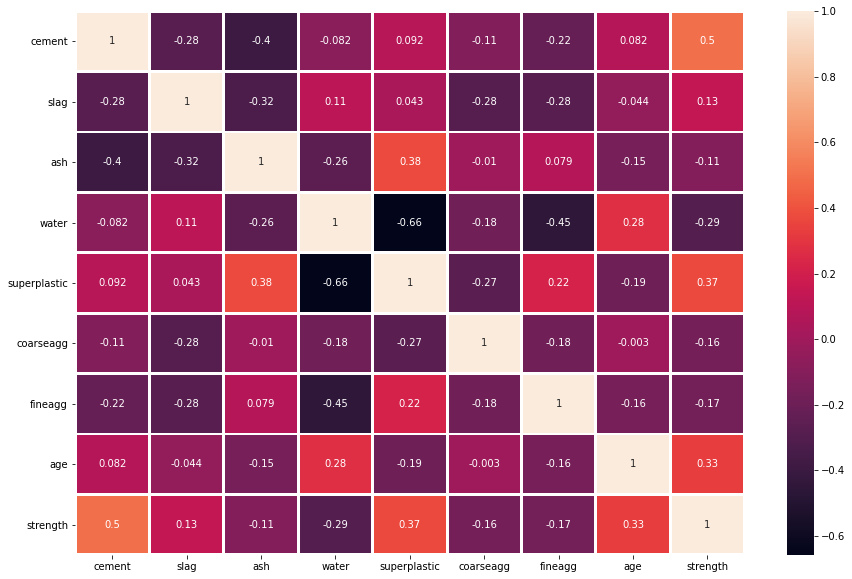

In [ ]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True, linewidths=2, fmt=".2g")

In [ ]:
sns.pairplot(df, diag_kind='kde')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


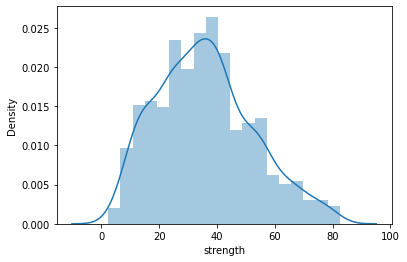

In [ ]:
sns.distplot(df.strength)

## (b) Use the snippet provided of the forward selection to reduce the number of covariates

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
def forward_selected(data, response):
    """Linear model designed by forward selection.
    The original version of this script is due to ajshumaher.
    I hacked it to get it closer to class materials. It is not perfect though

    Parameters:
    -----------
    data : pandas DataFrame with all possible predictors and response

    response: string, name of response column in data

    Returns:
    --------
    model: an "optimal" fitted statsmodels linear model
           with an intercept
           selected by forward selection
           evaluated by adjusted R-squared
    """
    remaining = set(data.columns)
    remaining.remove(response)
    models = {}
    null_candidate = "1"
    # the number one refers to the intercept in the model
    # We don't need to calculate the regression since in this case our estimate is the average of the response variable
    # that is, \hat{Y}= (mean(Y),\ldots,mean(Y))
    # In this case the R^2 =0
    models[null_candidate] = 0.0
    tmp_remaining = remaining
    key_variables = [null_candidate]
    for i in range(0, len(remaining)):
        candidate_and_scores = {}
        key_formula = []
        for candidate in tmp_remaining:
            key_formula = "+".join(key_variables + [candidate])
            formula = "{} ~ {} ".format(response, key_formula)
            score = smf.ols(formula, data).fit().rsquared
            candidate_and_scores[candidate] = score
        max_candidate = max(candidate_and_scores, key=candidate_and_scores.get)
        key_variables.append(max_candidate)
        models[",".join(str(x) for x in key_variables)] = candidate_and_scores[max_candidate]
        tmp_remaining.remove(max_candidate)
    models.pop("1")  # I'll remove the first one since R^2 (adjusted or not will be zero)
    models_adj = {}
    for variables, scores in models.items():
        my_formula = variables.replace(",", "+")
        formula = "{} ~ {} ".format(response, my_formula)
        score = smf.ols(formula, data).fit().rsquared_adj
        models_adj[variables] = score
    # max_candidate = max(models_adj, key=models_adj.get)

    return models_adj

In [ ]:
forward_selected(df, 'strength')

{'1,cement': 0.24710494345818634,
 '1,cement,superplastic': 0.34991015987722063,
 '1,cement,superplastic,age': 0.480238488500192,
 '1,cement,superplastic,age,slag': 0.5493760525609789,
 '1,cement,superplastic,age,slag,water': 0.582263810503351,
 '1,cement,superplastic,age,slag,water,ash': 0.6117585594339114,
 '1,cement,superplastic,age,slag,water,ash,coarseagg': 0.6115368728968511,
 '1,cement,superplastic,age,slag,water,ash,coarseagg,fineagg': 0.6125072934929343}

In [ ]:
for item, key in forward_selected(df, 'strength').items():
    print(item, key)

1,cement 0.24710494345818634
1,cement,superplastic 0.34991015987722063
1,cement,superplastic,age 0.480238488500192
1,cement,superplastic,age,slag 0.5493760525609789
1,cement,superplastic,age,slag,water 0.582263810503351
1,cement,superplastic,age,slag,water,ash 0.6117585594339114
1,cement,superplastic,age,slag,water,ash,coarseagg 0.6115368728968511
1,cement,superplastic,age,slag,water,ash,coarseagg,fineagg 0.6125072934929343


In [ ]:
forward_selected(df, 'strength')[item].max()

0.6125072934929343

## (c) Produce a python program that calculates the best subset selection.

In [ ]:
import itertools
import time
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

plt.style.use('ggplot')

In [ ]:
def fit_linear_reg(X,y):
    #Fit linear regression model and return RSS and R squared values
    model = linear_model.LinearRegression(fit_intercept = True)
    model.fit(X,y)
    RSS = mean_squared_error(y,model.predict(X)) * len(y)
    R_squared = model.score(X,y)
    return RSS, R_squared

In [ ]:
#Importing tqdm for the progress bar
from tqdm import tnrange, tqdm_notebook

#Initialization variables
y = df.strength
X = df.drop(columns = 'strength', axis = 1)
k = 7
RSS_list, R_squared_list, feature_list = [], [], []
numb_features = []

#Looping over k = 1 to k = 7 features in X
for k in tnrange(1,len(X.columns) + 1, desc = 'Loop...'):

    #Looping over all possible combinations: from 7 choose k
    for combo in itertools.combinations(X.columns,k):
        tmp_result = fit_linear_reg(X[list(combo)],y)   #Store temp result 
        RSS_list.append(tmp_result[0])                  #Append lists
        R_squared_list.append(tmp_result[1])
        feature_list.append(combo)
        numb_features.append(len(combo))   

#Store in DataFrame
df_r = pd.DataFrame({'numb_features': numb_features,'RSS': RSS_list, 'R_squared':R_squared_list,'features':feature_list})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  if sys.path[0] == '':


In [ ]:
df_min = df_r[df_r.groupby('numb_features')['RSS'].transform(min) == df_r['RSS']]
df_max = df_r[df_r.groupby('numb_features')['R_squared'].transform(max) == df_r['R_squared']]
display(df_min.head(3))
print()
print()
display(df_max.head(3))

,numb_features,RSS,R_squared,features
0,1,216002.659424,0.247837,"(cement,)"
11,2,186326.814977,0.351174,"(cement, superplastic)"
53,3,148827.441365,0.481754,"(cement, superplastic, age)"


,numb_features,RSS,R_squared,features
0,1,216002.659424,0.247837,"(cement,)"
11,2,186326.814977,0.351174,"(cement, superplastic)"
53,3,148827.441365,0.481754,"(cement, superplastic, age)"


In [ ]:
df_r['min_RSS'] = df_r.groupby('numb_features')['RSS'].transform(min)
df_r['max_R_squared'] = df_r.groupby('numb_features')['R_squared'].transform(max)
df_r.head()

,numb_features,RSS,R_squared,features,min_RSS,max_R_squared
0,1,216002.659424,0.247837,"(cement,)",216002.659424,0.247837
1,1,281954.649564,0.018179,"(slag,)",216002.659424,0.247837
2,1,283963.390442,0.011184,"(ash,)",216002.659424,0.247837
3,1,263084.779270,0.083887,"(water,)",216002.659424,0.247837
4,1,248689.775529,0.134014,"(superplastic,)",216002.659424,0.247837


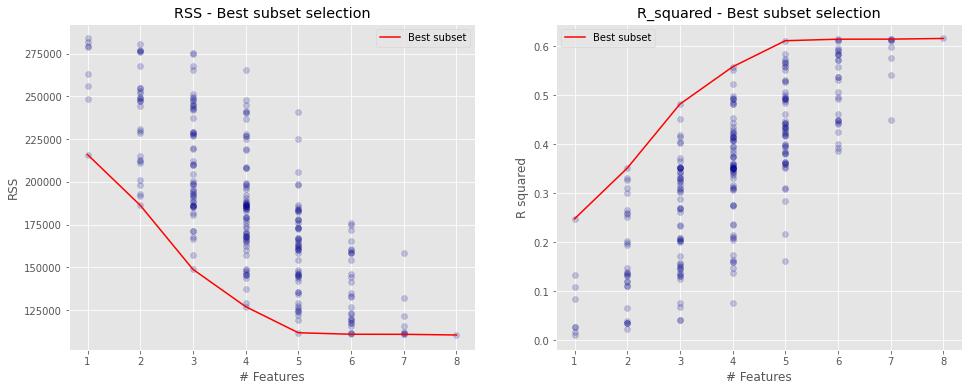

In [ ]:
fig = plt.figure(figsize = (16,6))
ax = fig.add_subplot(1, 2, 1)

ax.scatter(df_r.numb_features,df_r.RSS, alpha = .2, color = 'darkblue' )
ax.set_xlabel('# Features')
ax.set_ylabel('RSS')
ax.set_title('RSS - Best subset selection')
ax.plot(df_r.numb_features,df_r.min_RSS,color = 'r', label = 'Best subset')
ax.legend()

ax = fig.add_subplot(1, 2, 2)
ax.scatter(df_r.numb_features,df_r.R_squared, alpha = .2, color = 'darkblue' )
ax.plot(df_r.numb_features,df_r.max_R_squared,color = 'r', label = 'Best subset')
ax.set_xlabel('# Features')
ax.set_ylabel('R squared')
ax.set_title('R_squared - Best subset selection')
ax.legend()

plt.show()

In [ ]:
df1 = pd.concat([pd.DataFrame({'features':feature_list}),pd.DataFrame({'RSS':RSS_list, 'R_squared': R_squared_list})], axis=1, join='inner')
df1['numb_features'] = df1.index

In [ ]:
#Initializing useful variables
m = len(y)
p = 11
hat_sigma_squared = (1/(m - p -1)) * min(df1['RSS'])

#Computing
df1['C_p'] = (1/m) * (df1['RSS'] + 2 * df1['numb_features'] * hat_sigma_squared )
df1['AIC'] = (1/(m*hat_sigma_squared)) * (df1['RSS'] + 2 * df1['numb_features'] * hat_sigma_squared )
df1['BIC'] = (1/(m*hat_sigma_squared)) * (df1['RSS'] +  np.log(m) * df1['numb_features'] * hat_sigma_squared )
df1['R_squared_adj'] = 1 - ( (1 - df1['R_squared'])*(m-1)/(m-df1['numb_features'] -1))
df1

,features,RSS,R_squared,numb_features,C_p,AIC,BIC,R_squared_adj
0,"(cement,)",216002.659424,0.247837,0,209.711320,1.933521,1.933521,0.247837
1,"(slag,)",281954.649564,0.018179,1,273.952982,2.525823,2.530617,0.017224
2,"(ash,)",283963.390442,0.011184,2,276.113819,2.545746,2.555333,0.009258
3,"(water,)",263084.779270,0.083887,3,256.053927,2.360796,2.375176,0.081209
4,"(superplastic,)",248689.775529,0.134014,4,242.288798,2.233882,2.253056,0.130634
...,...,...,...,...,...,...,...,...
250,"(cement, slag, ash, superplastic, coarseagg, f...",111918.890692,0.610277,250,161.310019,1.487265,2.685642,0.485205
251,"(cement, slag, water, superplastic, coarseagg,...",115694.220278,0.597130,251,165.185991,1.523001,2.726172,0.467155
252,"(cement, ash, water, superplastic, coarseagg, ...",121769.118638,0.575976,252,171.294554,1.579321,2.787286,0.438455
253,"(slag, ash, water, superplastic, coarseagg, fi...",131952.143716,0.540517,253,181.391590,1.672415,2.885173,0.390711


## (d) Compare the best subset selection with the one obtained by the forward selection.

In [ ]:
print('The maximum R^2 of the feature selection is: ', df1.R_squared.max())
print('the maximum R^2 of the forward selection is: ', forward_selected(df, 'strength')[item].max())

The maximum R^2 of the feature selection is:  0.6155198704142721
the maximum R^2 of the forward selection is:  0.6125072934929343


In [ ]:
df1.features.iloc[-1]

('cement',
 'slag',
 'ash',
 'water',
 'superplastic',
 'coarseagg',
 'fineagg',
 'age')

In [ ]:
fs = pd.Series(forward_selected(df, 'strength'))


for row, val in fs.iteritems():
    print(str(row) + ' : ' + str(val))

1,cement : 0.24710494345818634
1,cement,superplastic : 0.34991015987722063
1,cement,superplastic,age : 0.480238488500192
1,cement,superplastic,age,slag : 0.5493760525609789
1,cement,superplastic,age,slag,water : 0.582263810503351
1,cement,superplastic,age,slag,water,ash : 0.6117585594339114
1,cement,superplastic,age,slag,water,ash,coarseagg : 0.6115368728968511
1,cement,superplastic,age,slag,water,ash,coarseagg,fineagg : 0.6125072934929343
